# NLP (Natural Language preprocessing)
### Airline tweets sentiments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('airline_tweets.csv')

In [10]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

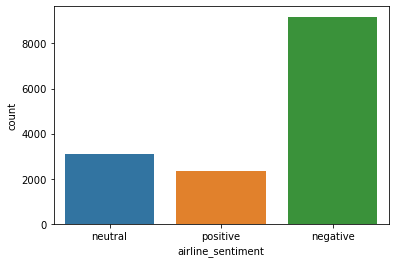

In [47]:
sns.countplot(data=df,x='airline_sentiment')

Negative tweets are more then neutral and positive tweets

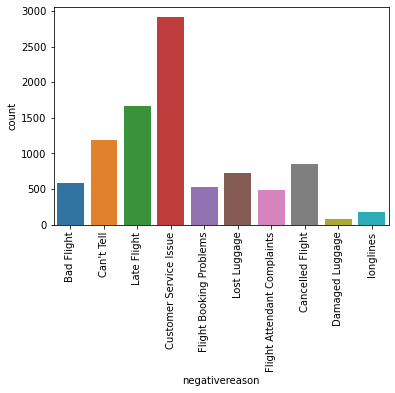

In [57]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

The reason of getting negative tweets because the customer service issue

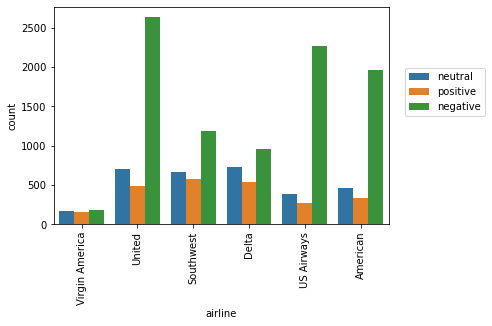

In [54]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')
plt.legend(loc=(1.05,0.5))
plt.xticks(rotation=90);

united airline has too many negative tweets and Delta airline has a good positive reviews.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


# Data Preparing for Model

In [11]:
X = df['text']
y = df['airline_sentiment']

# Split Data into train and test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Features Extracting

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tv = TfidfVectorizer(stop_words='english')

In [16]:
Tdf_X_train = tv.fit_transform(X_train)

In [17]:
Tdf_X_test = tv.transform(X_test)

In [18]:
Tdf_X_train.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# what is TD-idf 

it decrease the weight to those terms only which is occure very frequently in the document and increase the weight of terms which occure very rarely. - the common words in every document would have low weight and unique words have more weight

# importing Models and performing metrics

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

In [ ]:
Log = LogisticRegression(max_iter=1000000)
Log.fit(Tdf_X_train,y_train)
Log_prediction = Log.predict(Tdf_X_test)                                                   #Logistic Regression

In [21]:
D = DecisionTreeClassifier()
D.fit(Tdf_X_train,y_train)
D_prediction = D.predict(Tdf_X_test)                                                       # Decision Tree

In [22]:
R = RandomForestClassifier()
R.fit(Tdf_X_train,y_train)
R_prediction = R.predict(Tdf_X_test)                                                       # Random forest

In [23]:
G = GradientBoostingClassifier()
G.fit(Tdf_X_train,y_train)
G_prediction = G.predict(Tdf_X_test)                                                       # Gredient booster

In [24]:
svm = SVC()
svm.fit(Tdf_X_train,y_train)
svm_prediction = svm.predict(Tdf_X_test)                                                   # support vector Machine

In [25]:
def report(model):
    pred = model.predict(Tdf_X_test)
    print(classification_report(y_test,pred))
    print(plot_confusion_matrix(model,Tdf_X_train,y_train))                               # created a function which print the
                                                                                          # performance metrics of given model

              precision    recall  f1-score   support

    negative       0.77      0.77      0.77      2738
     neutral       0.41      0.41      0.41       947
    positive       0.55      0.55      0.55       707

    accuracy                           0.66      4392
   macro avg       0.58      0.58      0.58      4392
weighted avg       0.66      0.66      0.66      4392



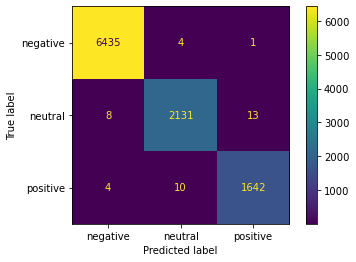

In [26]:
report(D)

              precision    recall  f1-score   support

    negative       0.73      0.95      0.83      2738
     neutral       0.64      0.22      0.33       947
    positive       0.75      0.52      0.61       707

    accuracy                           0.73      4392
   macro avg       0.71      0.57      0.59      4392
weighted avg       0.71      0.73      0.69      4392



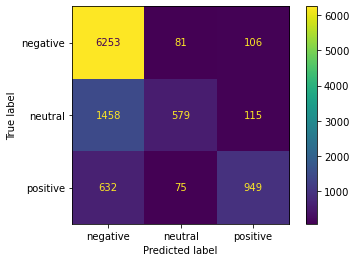

In [27]:
report(G)

              precision    recall  f1-score   support

    negative       0.76      0.94      0.84      2738
     neutral       0.62      0.35      0.45       947
    positive       0.74      0.50      0.60       707

    accuracy                           0.74      4392
   macro avg       0.71      0.60      0.63      4392
weighted avg       0.73      0.74      0.72      4392



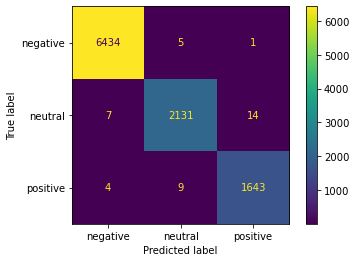

In [28]:
report(R)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.85      2738
     neutral       0.69      0.39      0.50       947
    positive       0.81      0.56      0.66       707

    accuracy                           0.77      4392
   macro avg       0.76      0.64      0.67      4392
weighted avg       0.76      0.77      0.75      4392



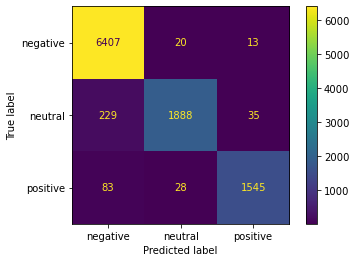

In [29]:
report(svm)

Random forest work well on this NLP text dataset. it caught negative tweets very well consequently neutral and positive tweets have less precision and recall. and harmonic mean of precision and recall which is f1-score

# let's check how Model work 

In [37]:
doc = ['flight was to bad']
doc = tv.transform(doc)
R.predict(doc)

array(['negative'], dtype=object)

In [38]:
doc = ['flight was very Good']
doc = tv.transform(doc)
R.predict(doc)

array(['positive'], dtype=object)

# Thank you